## Importing required libraries

In [34]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

## EDA on the dataset

In [35]:
data = pd.read_csv(r"C:\Users\pruth\Downloads\heart_2020_cleaned.csv\heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [39]:
data =  data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
data['Diabetic'] = data['Diabetic'].astype(int)

<AxesSubplot:>

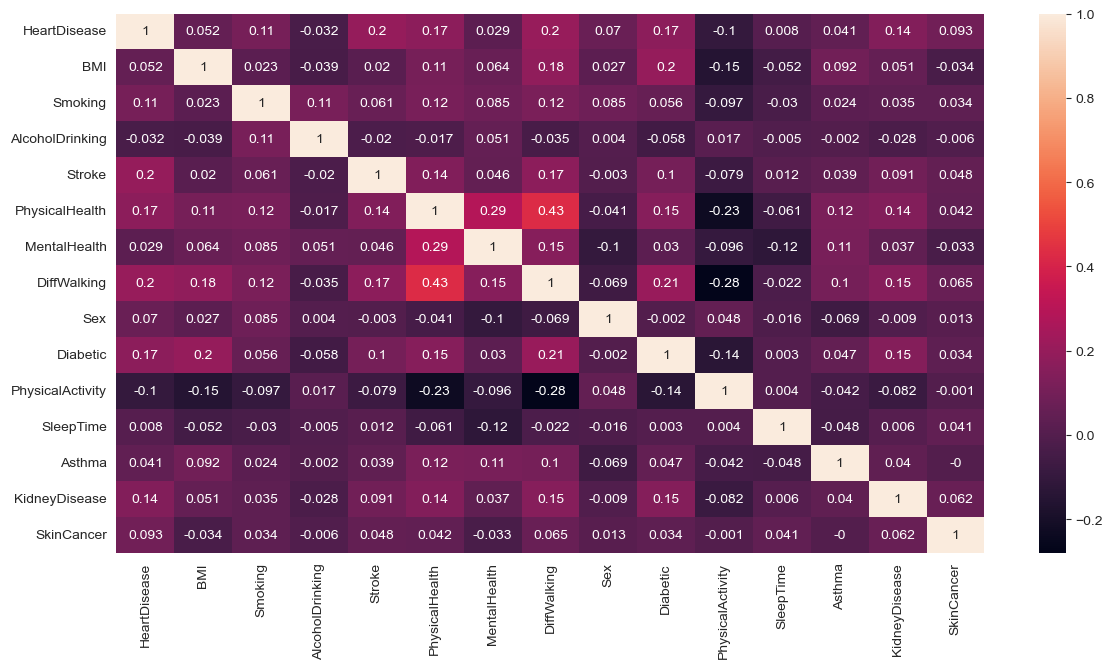

In [42]:
correlation = data.corr().round(3)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

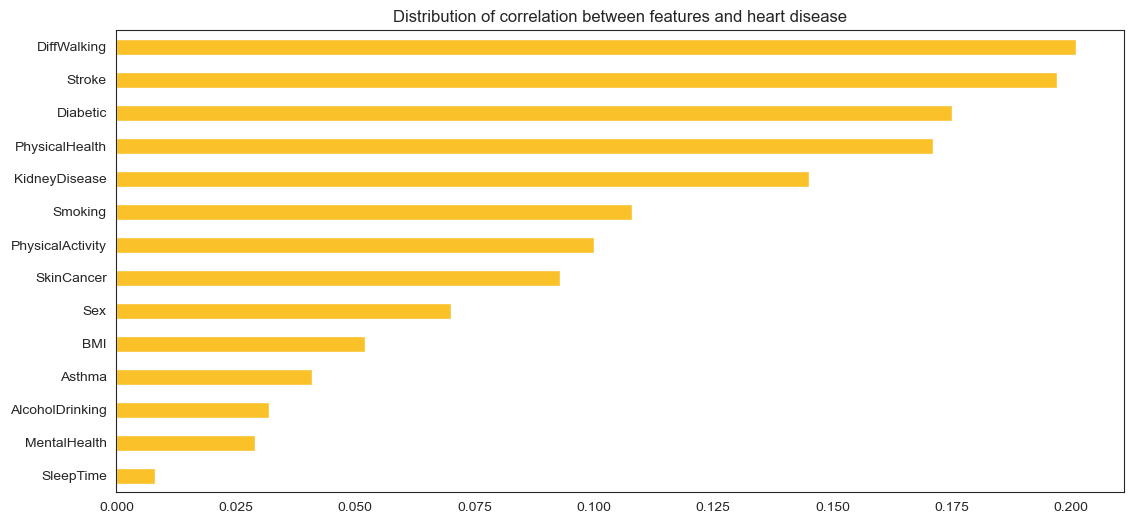

In [51]:
sns.set_palette('inferno_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation between features and heart disease')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

## We have some attributes that have more than two unique values, we'll use one hot encoding to conver them to numerical

In [3]:
data =  data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
data['Diabetic'] = data['Diabetic'].astype(int)

## Split Dataset for Training and Testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns =['HeartDisease'], axis = 1), data['HeartDisease'], shuffle = True, test_size = .1, random_state = 44)


## Data Preprocessing

In [5]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)

X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)


C:\Users\pruth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\pruth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)


## Model Building

In [7]:
X_train

array([[-0.26556594, -0.23661931, -0.24955024, ..., -0.39322626,
        -0.19490151,  3.1147121 ],
       [-0.26556594, -0.23661931, -0.24955024, ..., -0.39322626,
        -0.19490151,  3.1147121 ],
       [-0.26556594, -0.23661931, -0.24955024, ..., -0.39322626,
        -0.19490151, -0.32105696],
       ...,
       [-0.26556594, -0.23661931, -0.24955024, ..., -0.39322626,
        -0.19490151, -0.32105696],
       [-0.26556594, -0.23661931, -0.24955024, ...,  2.54306515,
        -0.19490151, -0.32105696],
       [-0.26556594,  4.22619771, -0.24955024, ..., -0.39322626,
        -0.19490151, -0.32105696]])

In [8]:
# Building a model using KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors = 5)

knn_model.fit(X_train, y_train)




KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(X_test)
knn_model_scores = {}
knn_model_scores['acc'] = metrics.accuracy_score(y_test, y_pred)
knn_model_scores['prec'] = metrics.precision_score(y_test, y_pred)
knn_model_scores['rec'] = metrics.recall_score(y_test, y_pred)
knn_model_scores['f1'] = metrics.f1_score(y_test, y_pred)
knn_model_scores['kappa'] = metrics.cohen_kappa_score(y_test, y_pred)

y_pred_proba = knn_model.predict_proba(X_test)[::,1]
knn_model_scores['fpr'], knn_model_scores['tpr'], _ = metrics.roc_curve(y_test, y_pred_proba)
knn_model_scores['auc'] = metrics.roc_auc_score(y_test, y_pred_proba)

knn_model_scores['cm'] = metrics.confusion_matrix(y_test, y_pred)

C:\Users\pruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:

print('Accuracy:', knn_model_scores['acc'])
print('Precision:', knn_model_scores['prec'])
print('Recall:', knn_model_scores['rec'])
print('F1 Score:', knn_model_scores['f1'])
print('Cohens Kappa Score:', knn_model_scores['kappa'])
print('Area Under Curve:', knn_model_scores['auc'])
print('Confusion Matrix:\n', knn_model_scores['cm'])

Accuracy: 0.906722951844903
Precision: 0.36684782608695654
Recall: 0.1506136110078096
F1 Score: 0.21355127867123652
Cohens Kappa Score: 0.173075576822718
Area Under Curve: 0.726187640546543
Confusion Matrix:
 [[28592   699]
 [ 2284   405]]


In [18]:

decision_tree_model = tree.DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train, y_train)
decision_tree_model_scores = {}
# Evaluate Model
y_pred = decision_tree_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

decision_tree_model_scores['acc'] = acc
prec = metrics.precision_score(y_test, y_pred)
decision_tree_model_scores['prec'] = prec
rec = metrics.recall_score(y_test, y_pred)
decision_tree_model_scores['rec'] = rec
f1 = metrics.f1_score(y_test, y_pred)
decision_tree_model_scores['f1'] = f1
kappa = metrics.cohen_kappa_score(y_test, y_pred)
decision_tree_model_scores['kappa'] = kappa

y_pred_proba = decision_tree_model.predict_proba(X_test)[::,1]
decision_tree_model_scores['fpr'], decision_tree_model_scores['tpr'], _ = metrics.roc_curve(y_test, y_pred_proba)
decision_tree_model_scores['auc'] = metrics.roc_auc_score(y_test, y_pred_proba)

decision_tree_model_scores['cm'] = metrics.confusion_matrix(y_test, y_pred)


In [19]:
print('Accuracy:', decision_tree_model_scores['acc'])
print('Precision:', decision_tree_model_scores['prec'])
print('Recall:', decision_tree_model_scores['rec'])
print('F1 Score:', decision_tree_model_scores['f1'])
print('Cohens Kappa Score:', decision_tree_model_scores['kappa'])
print('Area Under Curve:', decision_tree_model_scores['auc'])
print('Confusion Matrix:\n', decision_tree_model_scores['cm'])

Accuracy: 0.8669480925578487
Precision: 0.2336734693877551
Recall: 0.2554853105243585
F1 Score: 0.24409308935867827
Cohens Kappa Score: 0.17130631939153773
Area Under Curve: 0.588990916972848
Confusion Matrix:
 [[27038  2253]
 [ 2002   687]]


## model evaluation plots

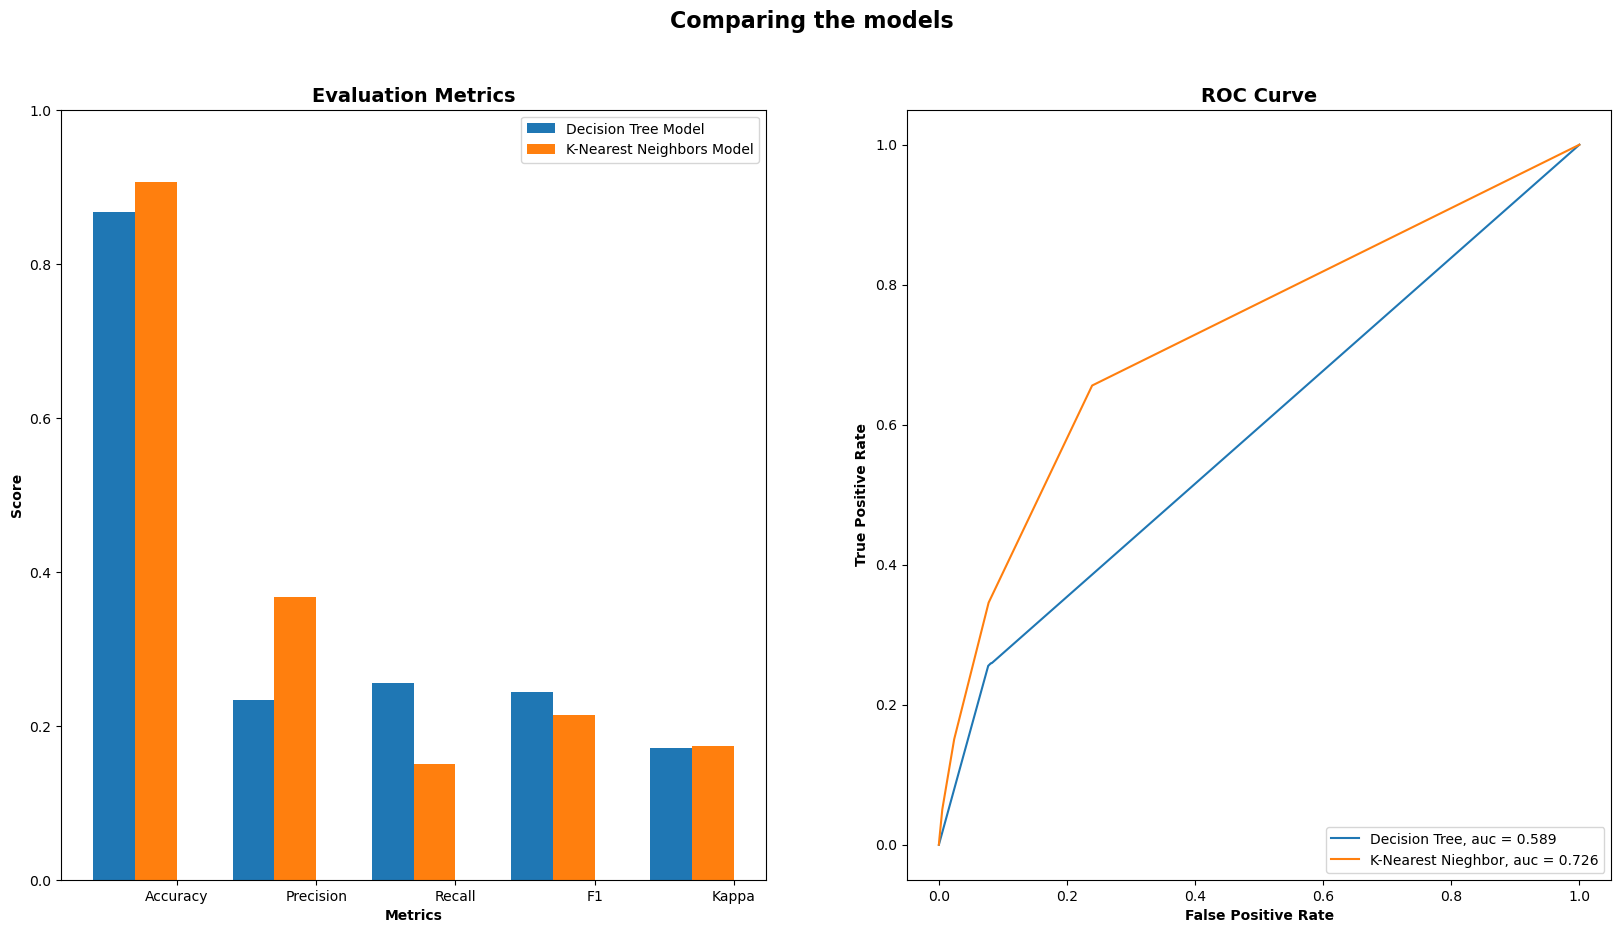

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparing the models', fontsize=16, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(20)

decision_tree_model_scores_list = [decision_tree_model_scores['acc'], decision_tree_model_scores['prec'], decision_tree_model_scores['rec'], decision_tree_model_scores['f1'], decision_tree_model_scores['kappa']]
knn_model_scores_list = [knn_model_scores['acc'], knn_model_scores['prec'], knn_model_scores['rec'], knn_model_scores['f1'], knn_model_scores['kappa']]

r1 = np.arange(len(decision_tree_model_scores_list))
r2 = [x + 0.3 for x in r1]

ax1.bar(r1, decision_tree_model_scores_list, width=0.3,  label='Decision Tree Model')
ax1.bar(r2, knn_model_scores_list, width=0.3,  label='K-Nearest Neighbors Model')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (0.3 * 1.5) for r in range(len(decision_tree_model_scores_list))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

ax2.plot(decision_tree_model_scores['fpr'], decision_tree_model_scores['tpr'], label='Decision Tree, auc = {:0.3f}'.format(decision_tree_model_scores['auc']))
ax2.plot(knn_model_scores['fpr'], knn_model_scores['tpr'], label='K-Nearest Nieghbor, auc = {:0.3f}'.format(knn_model_scores['auc']))

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()